# **Project Name** - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

- This is real stock data of Yes Bank — which was once known as one of India’s fastest-growing private banks. Over time, the bank's stock price went through huge ups and downs. At its peak, it touched around ₹400, but later dropped below ₹10, mainly due to a major scam involving its top management. This dataset captures the entire journey — from the early growth to the downfall. I'm really excited to dive into it, explore what the numbers tell us, and see how machine learning can help us predict where it might have gone.

# **GitHub Link -**

https://github.com/Vaisakh-Nirupam/Yes_Bank_Stock_Closing_Price_Prediction

# **Problem Statement -**


- In this project, I’m trying to predict the monthly closing price of Yes Bank’s stock using past stock data. I’ll be analyzing trends and patterns in values like Open, High, Low, and Close prices to train machine learning models. The goal is to see if these models can accurately estimate future prices, which could help in making smarter investment decisions.

## ***1. Know Your Data***

### Import Libraries

In [86]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


### Dataset Loading

In [87]:
# Load Dataset
df = pd.read_csv('Dataset/data_YesBank_StockPrices.csv')

### Dataset First View

In [88]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [89]:
# Dataset Rows & Columns count
df.shape

(185, 5)

- `Rows`: 185

- `Columns`: 5

### Dataset Information

In [90]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


- `Date` requires type conversion.

- `No nulls` present

#### Duplicate Values

In [91]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

- `No Duplicates` are found.

#### Missing Values/Null Values

In [92]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

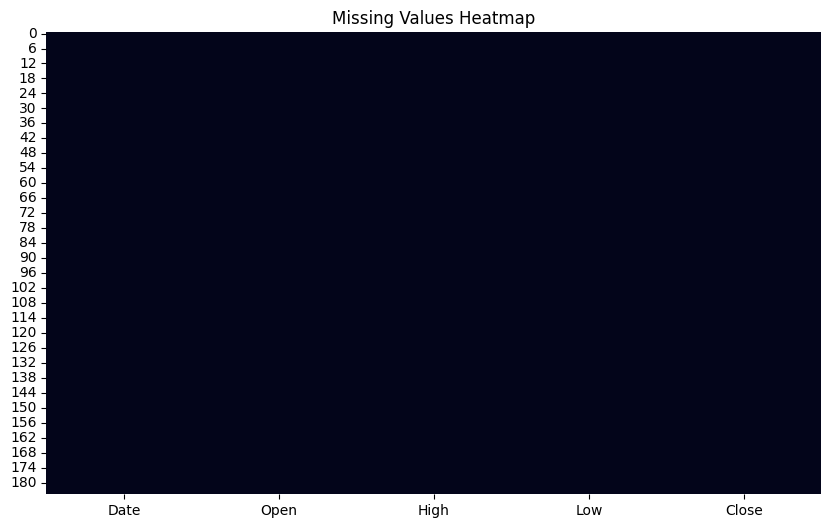

In [93]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

- This is empty because there is `no null` values present.

### What did you know about your dataset?

- This dataset contains the monthly stock price records of Yes Bank, one of India’s leading private banks that experienced a major financial downfall. It includes important financial features like Open, High, Low, and Close prices for each month, along with the Date column to help track the stock’s performance from 2005 to 2020.

## ***2. Understanding Your Variables***

In [94]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [95]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


- The stock went as high as `₹404` and as low as `₹5.5`.

- The lowest opening ever recorded was `₹10`, and the highest was `₹370`.

- The lowest closing was ₹10, and the highest was `₹367`.

### Variables Description

1. `Date` – The month and year.
2. `Open` – The price at the start of the month.
3. `High` – The highest price during that month.
4. `Low` – The lowest price during that month.
5. `Close` – The price at the end of the month.

### Check Unique Values for each variable.

In [96]:
# Check Unique Values for each variable.
for i in df:
    print(f"{i}: {df[i].nunique()}")

Date: 185
Open: 183
High: 184
Low: 183
Close: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [97]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y') 
df = df.sort_values('Date') 
df = df.reset_index(drop=True) 

# Added more features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

### What all manipulations have you done and insights you found?

- Converted the `Date` column to `datetime` format and sorted the data chronologically to prepare it for time-based analysis.

- This helped us clearly observe Yes Bank’s journey from its rise to a major crash, revealing strong patterns and turning points in the stock’s history.

- Extracted separate Month and Year columns from the Date, which will help in creating more detailed and meaningful charts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

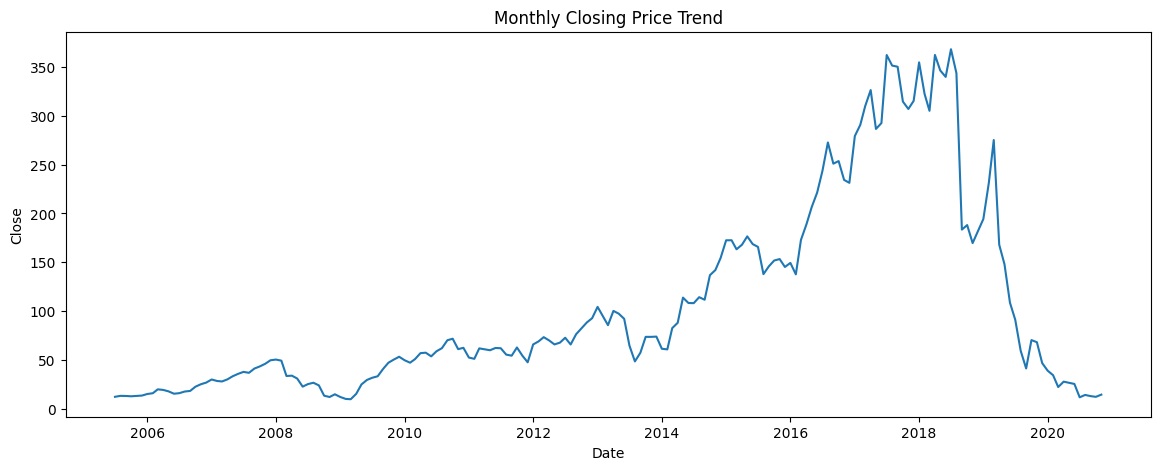

In [98]:
# Chart - 1 visualization code
plt.figure(figsize=(14,5))
plt.title('Monthly Closing Price Trend')
sns.lineplot(data=df, x='Date', y='Close')
plt.show()

##### 1. Why did you pick the specific chart?

- I chose a line plot because it is the most effective way to visualize time series data, especially when tracking stock prices over a period. It clearly shows trends, rises, and falls over time, making it ideal for analyzing the monthly closing prices of Yes Bank.

##### 2. What is/are the insight(s) found from the chart?

- From this line chart, we can clearly see that Yes Bank’s stock steadily grew over the years, reaching its highest point around 2018. But right after that, there’s a sharp fall in the prices. This sudden drop reflects the bank’s financial troubles and possibly the loss of trust from investors.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- It clearly shows that the stock price kept rising for a few years and then suddenly crashed. This drop highlights how external events (like the scam) can seriously affect people’s trust in a company.

- At the same time, it also reminds us how important it is to track stock trends early, so that businesses and investors can make smarter decisions before things go wrong.

#### Chart - 2

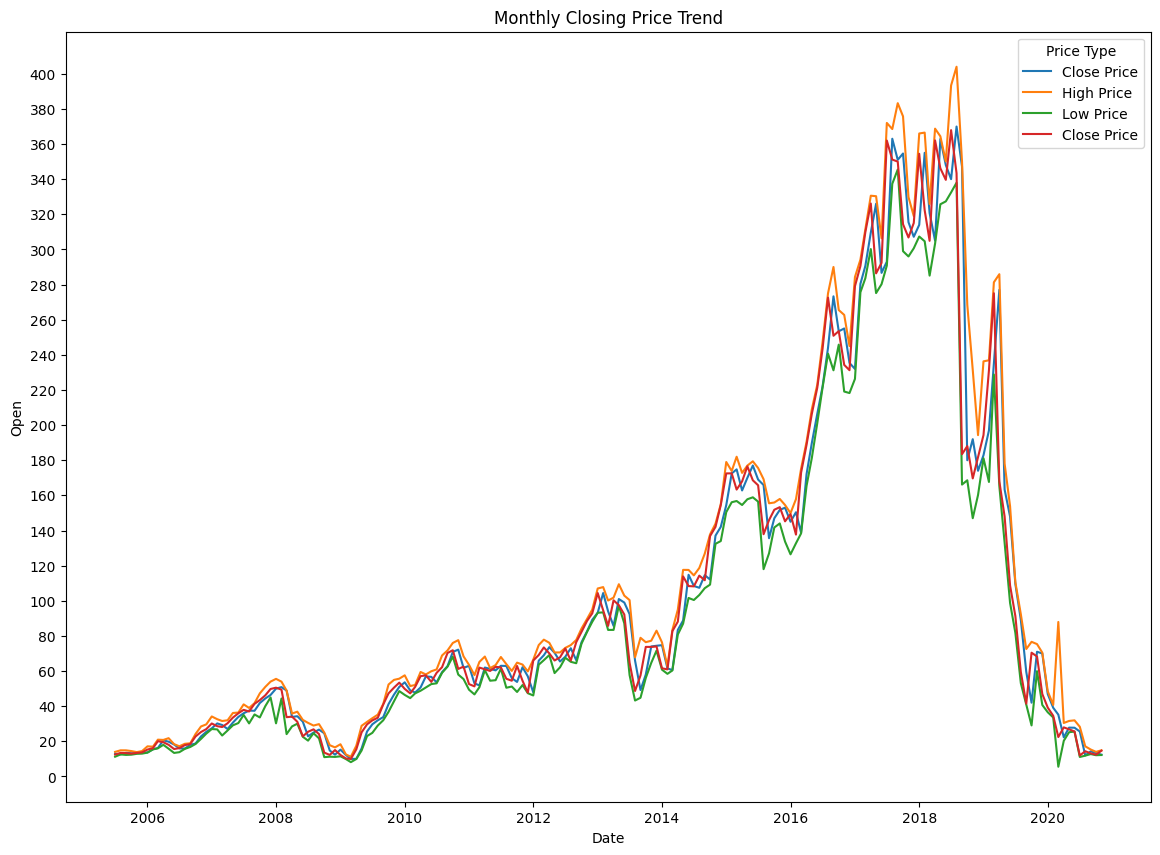

In [99]:
# Chart - 2 visualization code
plt.figure(figsize=(14,10))
plt.title('Monthly Closing Price Trend')
sns.lineplot(data=df, x='Date', y='Open', label='Close Price')
sns.lineplot(data=df, x='Date', y='High', label='High Price')
sns.lineplot(data=df, x='Date', y='Low', label='Low Price')
sns.lineplot(data=df, x='Date', y='Close', label='Close Price')
plt.legend(title='Price Type')
plt.yticks(range(0,401,20))
plt.show()

##### 1. Why did you pick the specific chart?

- Since this is stock market data, it heavily depends on time. A line plot is the best way to show how the prices change over time. It clearly shows all the ups and downs in the "High", "Low", and "Close" values for each month.

##### 2. What is/are the insight(s) found from the chart?

- It's just like a very detailed version of the previous chart. It shows the high, low, and close prices at each time point, unlike the single line before. It gives a clear picture of the stock’s full movement every month.

- The year 2019 shows a big leap of hope, which was suddenly followed by a tragic fall.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- The year 2019 showed a big rise followed by a sudden fall. This sharp movement is important for investors — it reminds us that even when things look good, we need to stay alert. It also highlights how quickly market sentiment can change, helping businesses prepare for similar patterns in the future

#### Chart - 3

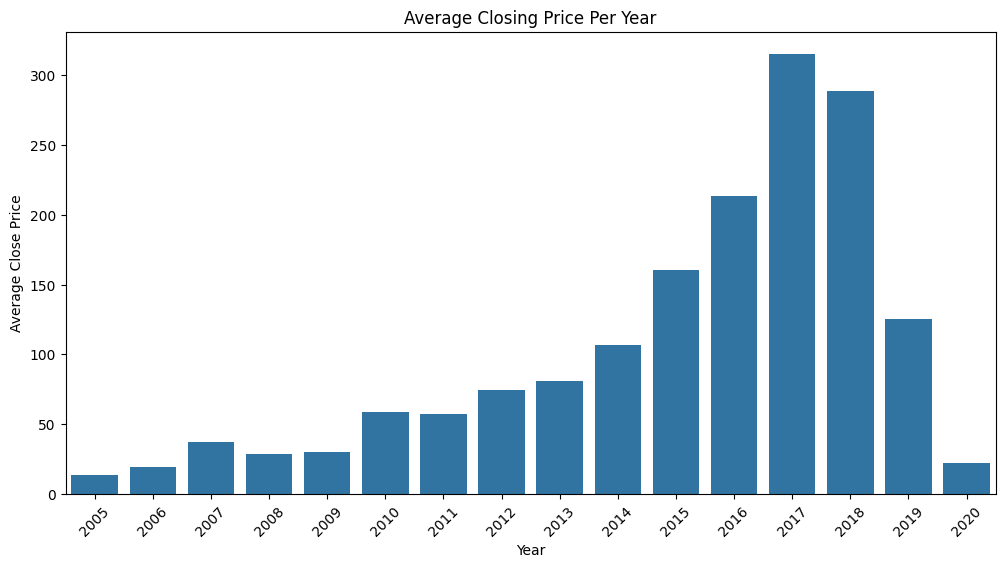

In [100]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
avg_close_per_year = df.groupby('Year')['Close'].mean().reset_index()
sns.barplot(data=avg_close_per_year, x='Year', y='Close')
plt.title('Average Closing Price Per Year')
plt.xticks(rotation=45)
plt.ylabel('Average Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

- A bar plot is perfect to compare yearly averages. Since the data spans from 2005 to 2020, this chart helps summarize the stock’s performance across each year clearly.

##### 2. What is/are the insight(s) found from the chart?

- 2017 had the highest average closing price, marking the peak of Yes Bank’s stock journey.

- The drop in 2018 seemed small at first, but the fall in the next two years was as bad as the early days of the bank's stock.

- It clearly shows a major shift in investor trust and performance after 2017.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Even a small dip can be a signal of a larger collapse if ignored.

- It teaches investors to react early to warning signs—many who heard early news might have sold in time and avoided major loss.

- This insight helps in planning smarter exit strategies and can build awareness about how sensitive stock markets can be to news and sentiment.

#### Chart - 4

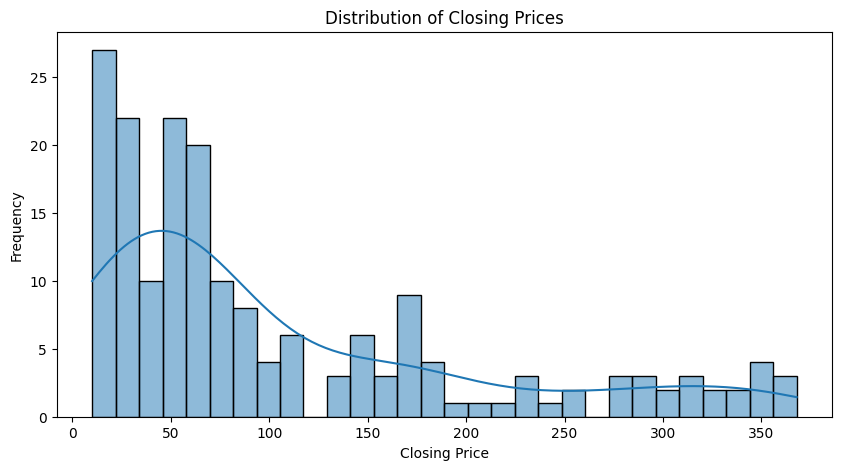

In [101]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

- I chose a histogram with KDE (Kernel Density Estimation) to understand the overall distribution of the closing stock prices. This chart helps us see how the values are spread and where most prices were concentrated.

##### 2. What is/are the insight(s) found from the chart?

- We can see that most of the closing prices are concentrated below ₹100, meaning the stock usually traded in that lower range. Higher prices were rare, which shows that Yes Bank had a few peak moments, but they didn’t last long.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, It warns us that even if the price rises briefly, it doesn’t always mean long-term growth, so planning must be done carefully to avoid being misled by temporary peaks. It also shows the importance of financial stability to maintain investor trust.

#### Chart - 5

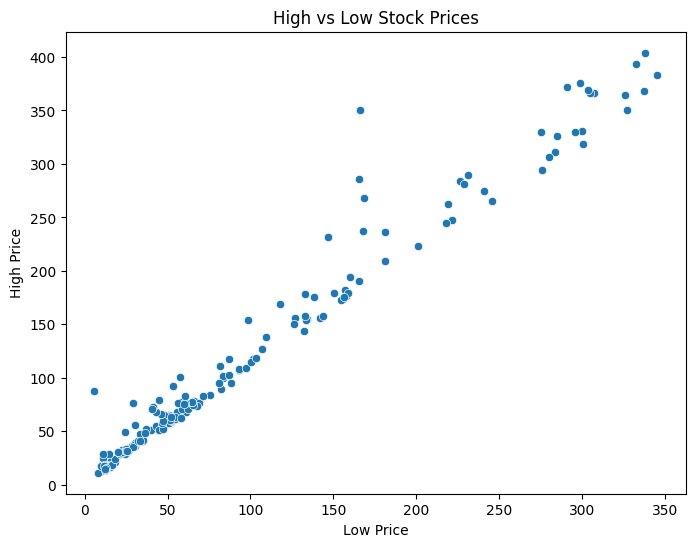

In [102]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Low', y='High', legend=False)
plt.title('High vs Low Stock Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.show()

##### 1. Why did you pick the specific chart?

- I used a scatter plot because it helps us see the connection between the lowest and highest stock prices in a month. It’s a simple way to understand how much the price moved.

##### 2. What is/are the insight(s) found from the chart?

- When the low price is high, the high price is also high — they move together.

- Most dots are crowded at the bottom or the start showing the business failure.

- Interestingly, there's one point where the low price was very lower than the high price on the same day.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, this helps us spot risky behavior in the market. If a stock jumps a lot in one day, it’s often driven by news or panic — something investors should prepare for.

#### Chart - 6 - Correlation Heatmap

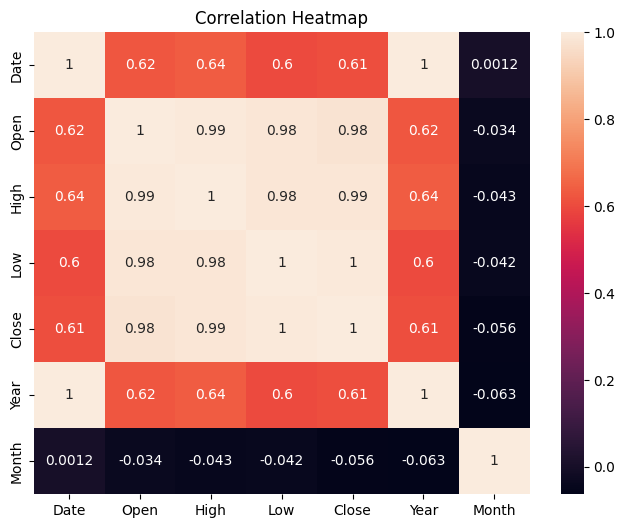

In [103]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

- A correlation heatmap helps us understand how numerical columns are related to each other. It's one of the best tools to quickly check which values move together.

##### 2. What is/are the insight(s) found from the chart?

- The Date column shows only average correlation with the stock price columns. This is expected since date itself doesn’t directly influence price, but the events tied to dates do.

- Columns like Open, High, Low, and Close are highly correlated with each other. For example, if the high price increases on a day, chances are the close and low prices also increase — meaning the stock tends to move together in the same direction across price points.

#### Chart - 7 - Pair Plot

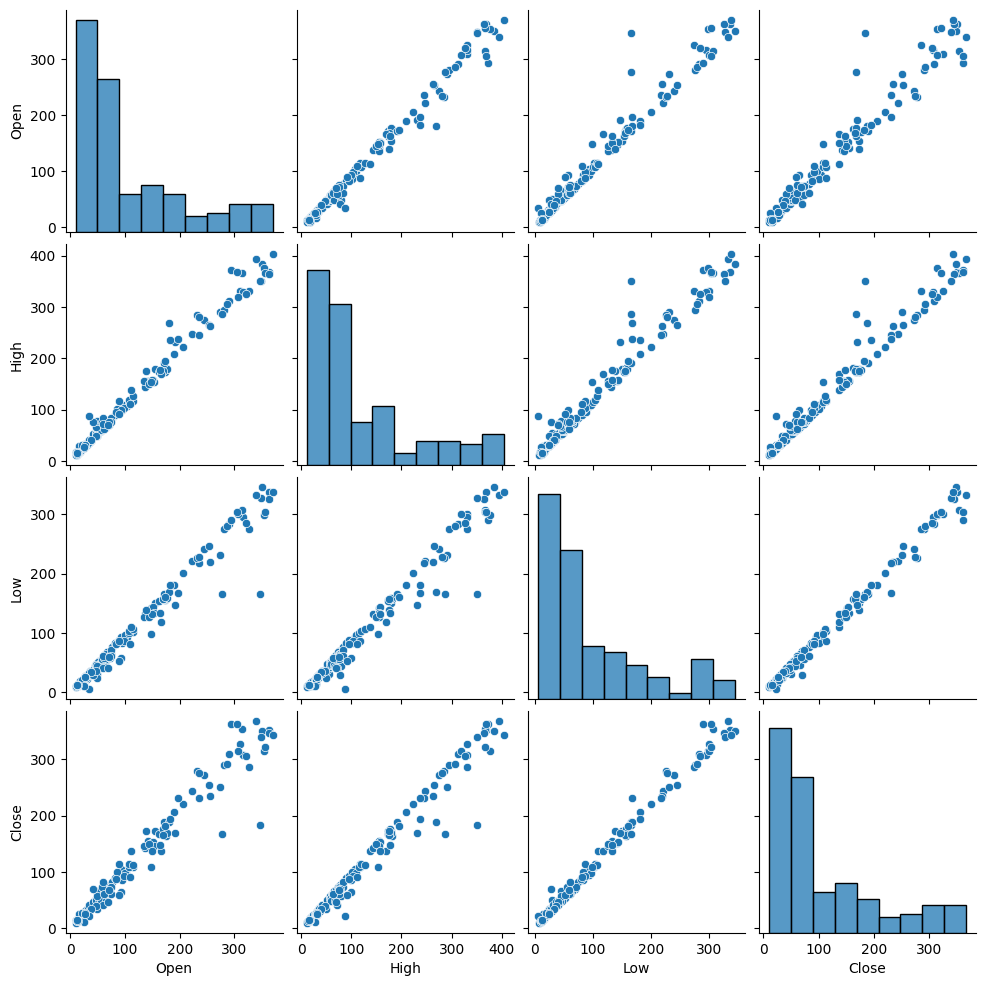

In [104]:
# Pair Plot visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.show()

##### 1. Why did you pick the specific chart?

- To visualize both distributions and relationships between multiple numeric columns at once. 

- It helps in identify which variables are strongly correlated and spots any unusual patterns or clusters.

##### 2. What is/are the insight(s) found from the chart?

- Most of the points follow a clear linear trend, showing that Open, High, Low, and Close prices move closely together.

- There are only one or two values that stand out from this linear pattern — possible outliers.

- The data points are mostly crowded toward the edges, with only a few scattered in the middle, hinting at extreme price periods and more stable times in between.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The average closing price before 2018 is equal to the average closing price after 2018.

- Alternate Hypothesis (H₁): The average closing price before 2018 is not equal to the average closing price after 2018.

#### 2. Perform an appropriate statistical test.

In [105]:
# Perform Statistical Test to obtain P-Value
before_2018 = df[df['Year'] < 2018]['Close']
after_2018 = df[df['Year'] >= 2018]['Close']

t_stat, p_value = ttest_ind(before_2018, after_2018, equal_var=False)
print("P-Value:", p_value)

P-Value: 0.022988817858737694


- The p-value is < 0.05, so we reject the null hypothesis

##### Which statistical test have you done to obtain P-Value?

- T-test

##### Why did you choose the specific statistical test?

- Cause the comparison is between two independent groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The average closing prices for 2017, 2018, 2019, and 2020 are equal.

- Alternate Hypothesis (H₁): At least one year has a different average closing price.

#### 2. Perform an appropriate statistical test.

In [106]:
# Perform Statistical Test to obtain P-Value
# Filter data for specific years
close_2017 = df[df['Year'] == 2017]['Close']
close_2018 = df[df['Year'] == 2018]['Close']
close_2019 = df[df['Year'] == 2019]['Close']
close_2020 = df[df['Year'] == 2020]['Close']

# Apply One-Way ANOVA
f_stat, p_value = f_oneway(close_2017, close_2018, close_2019, close_2020)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 64.41310098521092
P-Value: 5.986020810511069e-16


- P-value is extremely small i.e much less than 0.05, So we strongly reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

- Anova

##### Why did you choose the specific statistical test?

- Cause we are comparing more than two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant correlation between the Low and High prices. 

- Alternate Hypothesis (H₁): There is a significant positive correlation between the Low and High prices.

#### 2. Perform an appropriate statistical test.

In [107]:
# Perform Statistical Test to obtain P-Value
correlation, p_val = pearsonr(df['Low'], df['High'])
print("Correlation Coefficient:", correlation)
print("P-Value:", p_val)

Correlation Coefficient: 0.9834220453868543
P-Value: 1.19637694892894e-137


##### Which statistical test have you done to obtain P-Value?

- Pearson Correlation Coefficient

##### Why did you choose the specific statistical test?

- Both Low and High are continuous numerical values. The Pearson test helps us check how strongly they are linearly related.

## ***6. Data Pre-processing***

#### 1. Feature Selection

In [108]:
# Select your features wisely to avoid overfitting
df_selected = df[['Year', 'Month', 'Open', 'High', 'Low', 'Close']]

X = df_selected.drop('Close', axis=1)
y = df_selected['Close']

##### What all feature selection methods have you used  and why?

Selected `'Year', 'Month', 'Open', 'High', 'Low', 'Close'` and avoided 'Date' because: 
- it is not a numerical value 
- it is easy to get input from user 
- it is easy for model to understand.

##### Which all features you found important and why?

- All five features in the dataset — Date, Open, High, Low, and Close — appear to be important and carry useful information.

- Since the dataset is small and each feature is meaningful, dropping any of them may result in loss of valuable information.

### 2. Data Scaling

In [109]:
# Scaling your data
std = StandardScaler()
X_scaled = std.fit_transform(X)

##### Which method have you used to scale you data and why?

- Used StandardScaler to scale the data.
- Because i want to keep the small outlier values present.
- Also my targeted models work best with standard scaled data. 

### 3. Data Splitting

In [110]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

##### What data splitting ratio have you used and why?

- Used 80-20 split ratio to train and test the model.
- Cause the data is small so i want the model to learn more.

## ***7. ML Model Implementation***

### ML Model - 1

In [112]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [113]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [114]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [115]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - 3

In [118]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [121]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [122]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***